   OBJECTID  FIPS_ID      COUNTY  AREA_ACRES    SHAPE_AREA      SHAPE_LEN  \
0         2    25003   BERKSHIRE    605697.0  2.451161e+09  247129.554153   
1         3    25005     BRISTOL    365988.5  1.481121e+09  501028.949137   
2         4    25007       DUKES     70335.6  2.846304e+08  307054.752491   
3         5    25009       ESSEX    329540.1  1.333595e+09  624440.032395   
4         1    25001  BARNSTABLE    263988.0  1.068310e+09  914189.089477   

                                            geometry  
0  POLYGON ((77140.46 940054, 77271.68 940035.13,...  
1  MULTIPOLYGON (((241888.92 851747.06, 241922.64...  
2  MULTIPOLYGON (((275042.5 803927.56, 275096.31 ...  
3  MULTIPOLYGON (((242123.03 912106.69, 242151.88...  
4  MULTIPOLYGON (((306542.38 822469.13, 306590.88...  


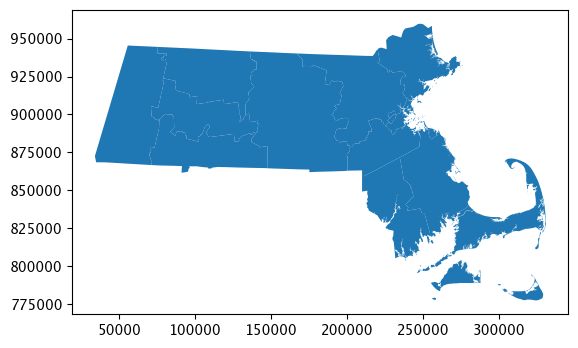

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import warnings
import pandas as pd

mass_counties=gpd.read_file('../counties_shapefiles/COUNTIES_POLYM.shp')
print(mass_counties.head())


mass_counties.plot()
plt.show()


In [3]:
mass_counties.head()

,OBJECTID,FIPS_ID,COUNTY,AREA_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
0,2,25003,BERKSHIRE,605697.0,2.451161e+09,247129.554153,"POLYGON ((77140.46 940054, 77271.68 940035.13,..."
1,3,25005,BRISTOL,365988.5,1.481121e+09,501028.949137,"MULTIPOLYGON (((241888.92 851747.06, 241922.64..."
2,4,25007,DUKES,70335.6,2.846304e+08,307054.752491,"MULTIPOLYGON (((275042.5 803927.56, 275096.31 ..."
3,5,25009,ESSEX,329540.1,1.333595e+09,624440.032395,"MULTIPOLYGON (((242123.03 912106.69, 242151.88..."
4,1,25001,BARNSTABLE,263988.0,1.068310e+09,914189.089477,"MULTIPOLYGON (((306542.38 822469.13, 306590.88..."


# Generate the Mass Counties Maps

In [5]:
mass_parameters=pd.read_csv("../New_England_Datasets/NEW ENGLAND's data (states) - MA.csv")
mass_parameters

,COUNTY,Population,Income (per capita),Education \n(high school or higher attendance rate),Health (life expectancy),Crime rate (per population)
0,BARNSTABLE,"231,735","$61,307",96.20%,79.5,0.05510
1,BERKSHIRE,"128,818","$47,845",94.50%,77.7,0.03270
2,BRISTOL,"581,841","$42,385",86.60%,77.4,0.07140
3,DUKES,"20,751","$71,014",95.30%,83.1,0.00204
4,ESSEX,"810,089","$51,263",90.10%,79.7,0.11000
5,FRANKLIN,"70,836","$42,160",93.10%,79.3,0.00204
6,HAMPDEN,"460,291","$37,635",86.80%,76.3,0.13700
7,HAMPSHIRE,"162,502","$43,499",95.60%,80.2,0.01220
8,MIDDLESEX,"1,623,952","$67,183",93.70%,81.5,0.16100
9,NANTUCKET,"14,299","$72,733",96.00%,82.8,0.00204


In [6]:
mass_parameters.columns.tolist()

['COUNTY',
 'Population',
 'Income (per capita)',
 'Education \n(high school or higher attendance rate)',
 'Health (life expectancy)',
 'Crime rate (per population)']

In [7]:
mass_counties['Population'] = mass_parameters['Population'].str.replace(',', '').astype(float)
mass_counties['Income'] = mass_parameters['Income (per capita)'].str.replace('$', '').str.replace(',', '').astype(float)
mass_counties['Education']=mass_parameters['Education \n(high school or higher attendance rate)'].str.replace('%', '').astype(float)
mass_counties['Health']=mass_parameters['Health (life expectancy)']
mass_counties['Crime Rate']=mass_parameters['Crime rate (per population)']

mass_counties['Income'] = pd.to_numeric(mass_counties['Income'], errors='coerce')
mass_counties['Health'] = pd.to_numeric(mass_counties['Health'], errors='coerce')
mass_counties['Crime Rate'] = pd.to_numeric(mass_counties['Crime Rate'], errors='coerce')
mass_counties['Population'] = pd.to_numeric(mass_counties['Population'], errors='coerce')



In [8]:
mass_counties = mass_counties.dissolve(by='COUNTY', aggfunc='first').reset_index()


mass_counties = mass_counties.to_crs(epsg=4326)

m = folium.Map(location=[44, -71], zoom_start=6)

# All your choropleth layers
folium.Choropleth(
    geo_data=mass_counties,
    name='Income',
    data=mass_counties,
    columns=['COUNTY', 'Income'],
    key_on='feature.properties.COUNTY',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Income per Capita ($)',
    overlay=True,
    show=True
).add_to(m)

folium.Choropleth(
    geo_data=mass_counties,
    name='Education',
    data=mass_counties,
    columns=['COUNTY', 'Education'],
    key_on='feature.properties.COUNTY',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Education (%)',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=mass_counties,
    name='Healthcare',
    data=mass_counties,
    columns=['COUNTY', 'Health'],
    key_on='feature.properties.COUNTY',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Life Expectancy',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=mass_counties,
    name='Crime Rate',
    data=mass_counties,
    columns=['COUNTY', 'Crime Rate'],
    key_on='feature.properties.COUNTY',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Crime Rate',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=mass_counties,
    name='Population',
    data=mass_counties,
    columns=['COUNTY', 'Population'],
    key_on='feature.properties.COUNTY',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Population',
    overlay=True,
    show=False
).add_to(m)

# Create a feature group with higher z-index for tooltips
tooltip_layer = folium.FeatureGroup(name='State Info', overlay=True, control=True, show=True)

# Add GeoJson to the feature group
folium.GeoJson(
    mass_counties,
    tooltip=folium.GeoJsonTooltip(
        fields=['COUNTY', 'Population', 'Income', 'Education', 'Health', 'Crime Rate'],
        aliases=['County:', 'Population:', 'Income/capita:', 'Education %:', 'Life Expectancy:', 'Crime Rate:'],
        style='background-color: white; color: black; font-size: 12px; padding: 10px;',
        sticky=False
    ),
    style_function=lambda x: {
        'fillOpacity': 0,
        'color': 'black',
        'weight': 0.5,
        'zIndex': 1000  # High z-index to stay on top
    },
    highlight_function=lambda x: {
        'weight': 2,
        'color': 'yellow'
    }
).add_to(tooltip_layer)


tooltip_layer.add_to(m)

folium.LayerControl().add_to(m)

m.save('../maps/mass_counties_map.html')